In [32]:
import pandas as p
import numpy as n
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder                     #encoding
from sklearn.preprocessing import StandardScaler                   #standardisation
from sklearn.model_selection import train_test_split               #train/test split
from sklearn.model_selection import cross_val_score                #K-fold cross validation

#SVM libraries
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV                   #to find best parameter

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataframe from CSV File

dataframe = p.read_csv('/content/drive/My Drive/voice.csv')
dataframe.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
dataframe.shape

(3168, 21)

Number of cells labeled Male    :  1584
Number of cells labeled Female  :  1584

% of Voices labeled Male           :  50.0 %
% of Voices labeled Female         :  50.0 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


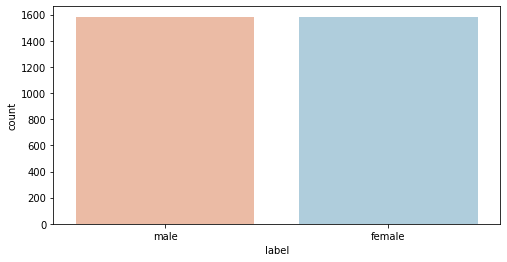

In [5]:
# visualize distribution of classes 

m.figure(figsize=(8, 4))
sns.countplot(dataframe['label'], palette='RdBu')

# count number of observations in each class
male, female = dataframe['label'].value_counts()
print('Number of cells labeled Male    : ', male)
print('Number of cells labeled Female  : ', female)
print('')
print('% of Voices labeled Male           : ', round(male / len(dataframe) * 100, 2), '%')
print('% of Voices labeled Female         : ', round(female / len(dataframe) * 100, 2), '%')

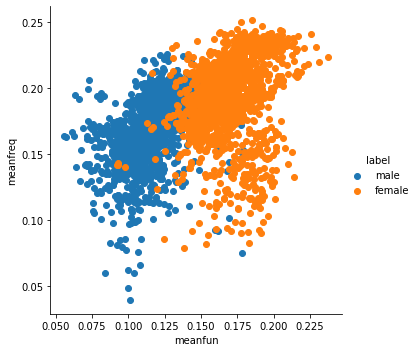

In [6]:
sns.FacetGrid(dataframe, hue="label", height=5).map(m.scatter, "meanfun", "meanfreq").add_legend()
m.show()

In [7]:
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
encode = LabelEncoder()
y = encode.fit_transform(y)
y
print('Male Label Encoded as ------> 1')
print('Female Label Encoded as ----> 0')

Male Label Encoded as ------> 1
Female Label Encoded as ----> 0


In [8]:
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

In [10]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [16]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)

0.9970931679491901


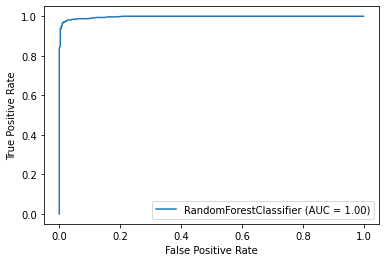

In [33]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,y_test)
plt.show()

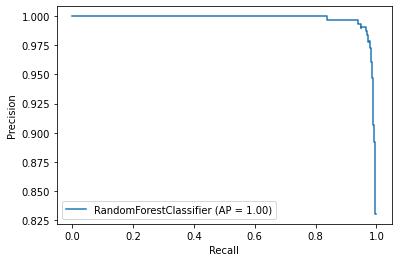

In [36]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,y_test)

In [39]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



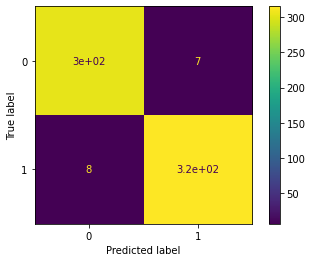

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [20]:
import pandas as pd

# Extract feature importances
fi = pd.DataFrame({'feature': list(dataframe.iloc[:,:-1].columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
12,meanfun,0.332216
3,Q25,0.196054
5,IQR,0.181599
1,sd,0.061186
9,sfm,0.036848
